In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [9]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [10]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
df[45:55]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [13]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]


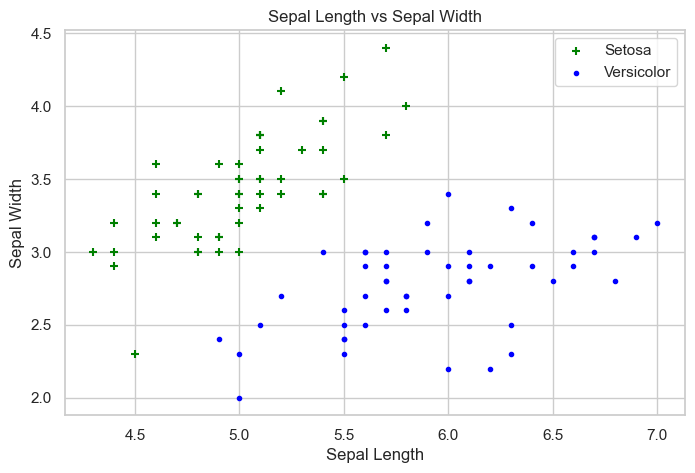

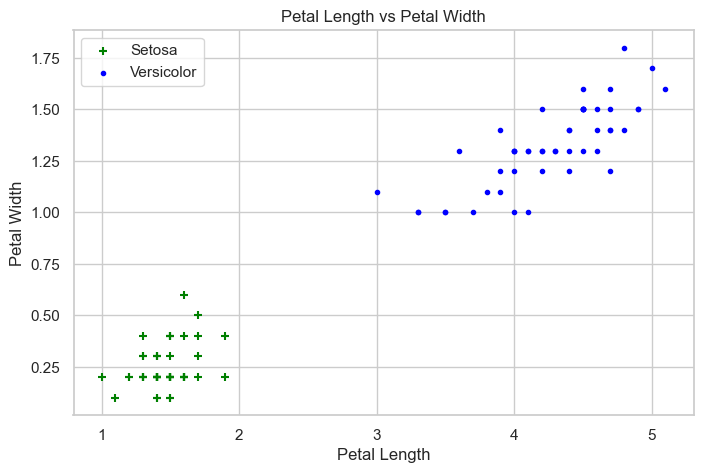

Sklearn KNN Accuracy: 0.9666666666666667


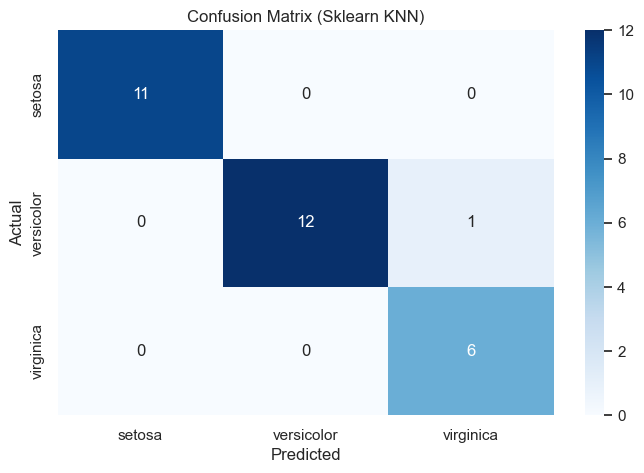

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

From Scratch KNN Accuracy (k=5): 0.7777777777777778
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.64      0.54      0.58        13
   virginica       0.60      0.69      0.64        13

    accuracy                           0.78        45
   macro avg       0.75      0.74      0.74        45
weighted avg       0.78      0.78      0.78        45



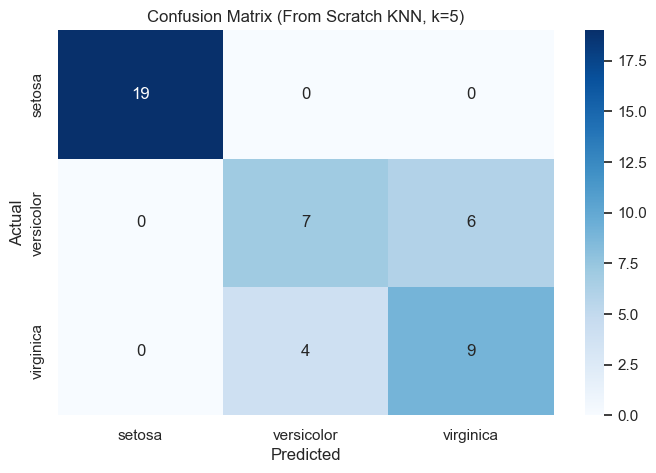

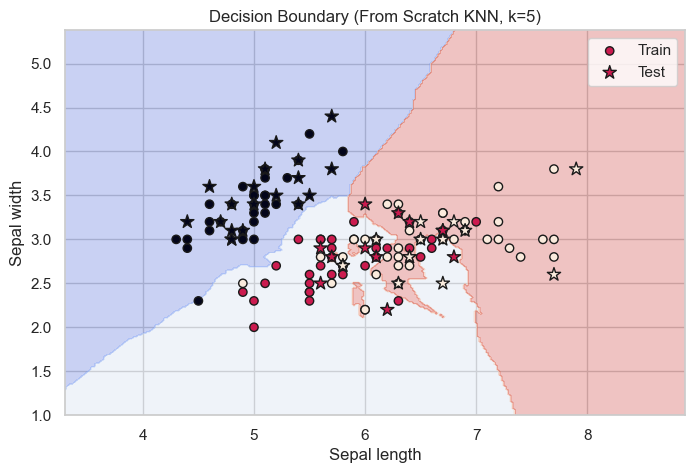

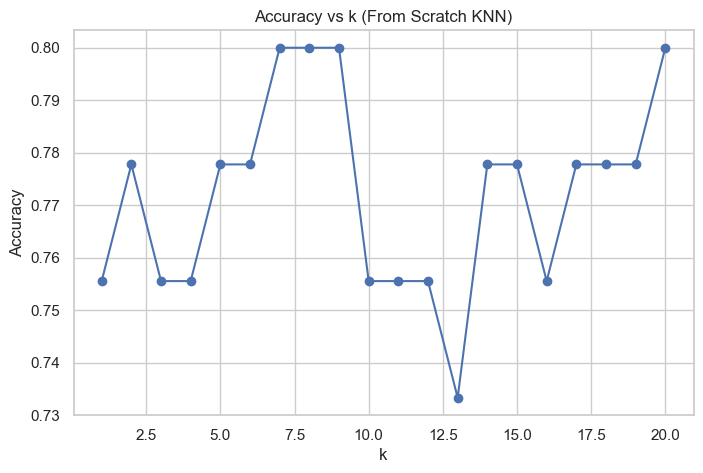

In [14]:
# -----------------------------
# KNN Classification Tutorial
# -----------------------------

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# -----------------------------
# Step 1: Load Iris Dataset
# -----------------------------
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Convert to DataFrame for visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['flower_name'] = df['target'].apply(lambda x: iris.target_names[x])

# -----------------------------
# Step 2: Visualize Features
# -----------------------------
# Split by classes
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

# Sepal length vs Sepal width (Setosa vs Versicolor)
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color="green", marker='+', label="Setosa")
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color="blue", marker='.', label="Versicolor")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs Sepal Width")
plt.legend()
plt.show()

# Petal length vs Petal width (Setosa vs Versicolor)
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color="green", marker='+', label="Setosa")
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color="blue", marker='.', label="Versicolor")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Petal Length vs Petal Width")
plt.legend()
plt.show()

# -----------------------------
# Step 3: Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# -----------------------------
# Step 4: KNN using sklearn
# -----------------------------
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

print("Sklearn KNN Accuracy:", knn.score(X_test, y_test))
y_pred = knn.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Sklearn KNN)")
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

# -----------------------------
# Step 5: KNN from Scratch
# -----------------------------
# Use first 2 features for visualization
X_vis = X[:, :2]
y_array = y.copy()  # ensure it's NumPy array for indexing

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y_array, test_size=0.3, random_state=42
)

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def knn_predict(X_train, y_train, X_test, k=3):
    predictions = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, x) for x in X_train]
        k_indices = np.argsort(distances)[:k]
        k_labels = [y_train[i] for i in k_indices]
        label = max(set(k_labels), key=k_labels.count)
        predictions.append(label)
    return np.array(predictions)

k = 5
y_pred_vis = knn_predict(X_train_vis, y_train_vis, X_test_vis, k=k)

print(f"From Scratch KNN Accuracy (k={k}):", accuracy_score(y_test_vis, y_pred_vis))
print("Classification Report:\n", classification_report(y_test_vis, y_pred_vis, target_names=target_names))

# Confusion matrix
cm_vis = confusion_matrix(y_test_vis, y_pred_vis)
sns.heatmap(cm_vis, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (From Scratch KNN, k={k})")
plt.show()

# -----------------------------
# Step 6: Decision Boundary
# -----------------------------
h = 0.02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = knn_predict(X_train_vis, y_train_vis, mesh_points, k=k)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis, edgecolors='k', marker="o", label="Train")
plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test_vis, edgecolors='k', marker="*", s=100, label="Test")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title(f"Decision Boundary (From Scratch KNN, k={k})")
plt.legend()
plt.show()

# -----------------------------
# Step 7: Accuracy vs K
# -----------------------------
k_values = range(1, 21)
acc_scores = []
for k_val in k_values:
    y_pred_k = knn_predict(X_train_vis, y_train_vis, X_test_vis, k=k_val)
    acc_scores.append(accuracy_score(y_test_vis, y_pred_k))

plt.plot(k_values, acc_scores, marker="o")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k (From Scratch KNN)")
plt.show()


Sklearn KNN Accuracy (Digits): 0.975


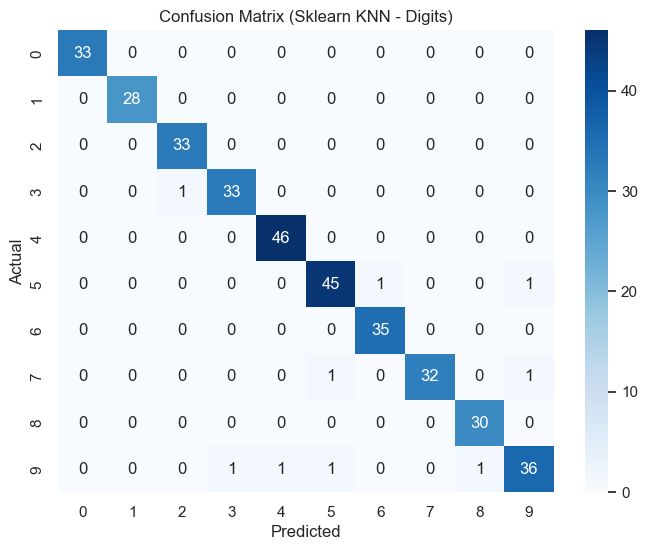

Classification Report (Digits):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       0.98      1.00      0.99        46
           5       0.96      0.96      0.96        47
           6       0.97      1.00      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      1.00      0.98        30
           9       0.95      0.90      0.92        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360

From Scratch KNN Accuracy (k=5): 0.975
Classification Report (From Scratch):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.

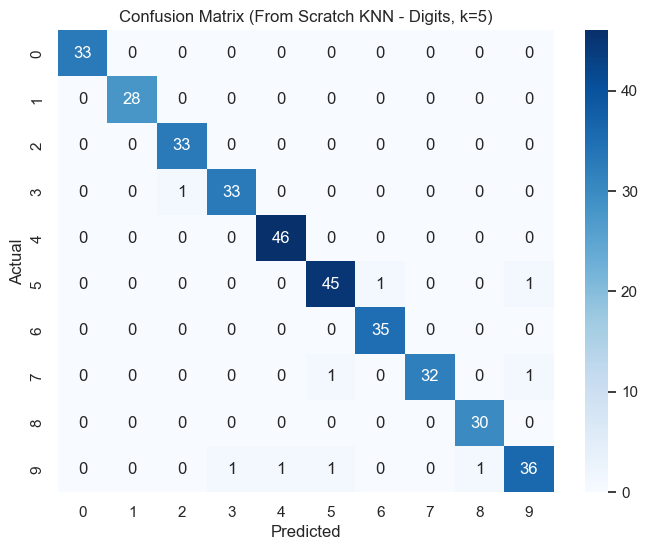

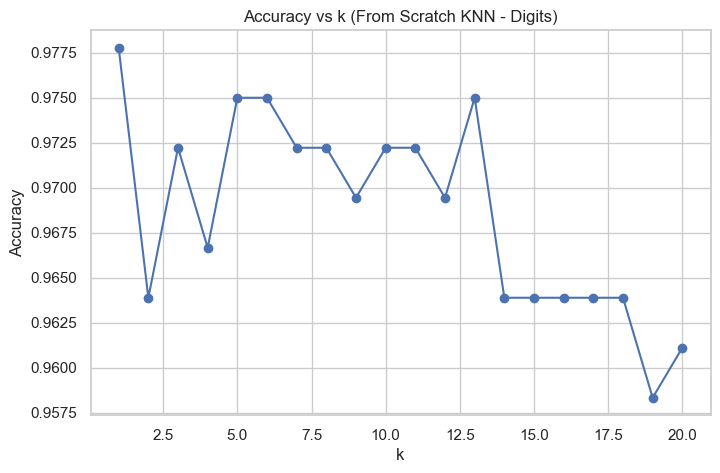

In [15]:
# -----------------------------
# KNN Classification on Digits Dataset
# -----------------------------

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# -----------------------------
# Step 1: Load Digits Dataset
# -----------------------------
digits = load_digits()
X_digits = digits.data
y_digits = digits.target
target_names_digits = digits.target_names

# Standardize features for better KNN performance
scaler = StandardScaler()
X_digits_scaled = scaler.fit_transform(X_digits)

# Train-test split
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X_digits_scaled, y_digits, test_size=0.2, random_state=42
)

# -----------------------------
# Step 2: Sklearn KNN Classifier
# -----------------------------
knn_digits = KNeighborsClassifier(n_neighbors=5)
knn_digits.fit(X_train_d, y_train_d)

y_pred_d = knn_digits.predict(X_test_d)
print("Sklearn KNN Accuracy (Digits):", knn_digits.score(X_test_d, y_test_d))

# Confusion matrix
cm_d = confusion_matrix(y_test_d, y_pred_d)
plt.figure(figsize=(8,6))
sns.heatmap(cm_d, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Sklearn KNN - Digits)")
plt.show()

# Classification report
print("Classification Report (Digits):\n", classification_report(y_test_d, y_pred_d))

# -----------------------------
# Step 3: KNN from Scratch
# -----------------------------
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

def knn_predict(X_train, y_train, X_test, k=5):
    predictions = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, x) for x in X_train]
        k_indices = np.argsort(distances)[:k]
        k_labels = [y_train[i] for i in k_indices]
        label = max(set(k_labels), key=k_labels.count)
        predictions.append(label)
    return np.array(predictions)

k = 5
y_pred_d_scratch = knn_predict(X_train_d, y_train_d, X_test_d, k=k)

print(f"From Scratch KNN Accuracy (k={k}):", accuracy_score(y_test_d, y_pred_d_scratch))
print("Classification Report (From Scratch):\n", classification_report(y_test_d, y_pred_d_scratch))

# Confusion matrix
cm_d_scratch = confusion_matrix(y_test_d, y_pred_d_scratch)
plt.figure(figsize=(8,6))
sns.heatmap(cm_d_scratch, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (From Scratch KNN - Digits, k={k})")
plt.show()

# -----------------------------
# Step 4: Accuracy vs k Curve
# -----------------------------
k_values = range(1, 21)
acc_scores_d = []

for k_val in k_values:
    y_pred_k = knn_predict(X_train_d, y_train_d, X_test_d, k=k_val)
    acc_scores_d.append(accuracy_score(y_test_d, y_pred_k))

plt.plot(k_values, acc_scores_d, marker="o")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k (From Scratch KNN - Digits)")
plt.show()
